# Multi-Layer Perceptrons
Input....Perceptron .....Prediction



# 1)-Import key modules

In [34]:
import matplotlib.pyplot as plt
# for deep learning packages
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Dropout

# 2)- Loading data

In [2]:
# load data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


# 3) Checking data

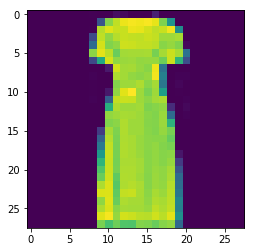

In [4]:
# lets see what the images look like

image = X_train[50, :].reshape((28, 28)) # checking a random row i.e 50 for image

plt.imshow(image)
plt.show()

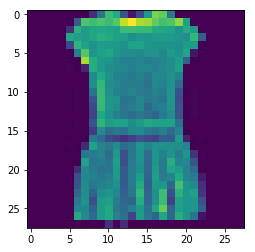

In [5]:
image = X_train[3, :].reshape((28, 28)) 

plt.imshow(image)
plt.show()

In [6]:
print(X_train.shape[0])
print(X_train.shape[1])
print(X_train.shape[2])

60000
28
28


In [7]:
img_width = X_train.shape[1]
img_height = X_train.shape[2]

In [8]:
print(img_width)

28


### a.one hot encode

In [9]:
print(y_train.shape[0])

60000


In [10]:
y_train.shape

(60000,)

y_train is 1 column with 60000 rows

In [11]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
labels = ["T-shirt/top", "Trouser", "Pullover", "Dress",
          "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [12]:
print(y_train.shape[0])

60000


In [13]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
y_train.shape

(60000, 10)

Now after encoding, y_train is 60000rows and 10 columns

### b.Normalize data

It is very important step as neural networks depend alot on normalization of data. Decision tree or Random Forest do not care much of normalization or scale of data

In [15]:
# Let it be between 0 and 1
# X_train= X_train.astype("float")
X_train = X_train / 255.
# X_test= X_test.astype("float")
X_test = X_test / 255.

In [16]:
num_classes = y_train.shape[1]

In [17]:
num_classes

10

In [18]:
batch_size = 256

# 4)-Create model

In [19]:
model = Sequential()
model.add(Flatten(input_shape=(img_width, img_height))) # flatten means that input will always be 28*28
model.add(Dense(num_classes, activation="softmax")) 
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Fit the model
history = model.fit(
        X_train, y_train,
        batch_size=batch_size,
        epochs=10, verbose=1,
        validation_data=(X_test, y_test)
    )

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 1s 12us/sample - loss: 0.8573 - acc: 0.7213 - val_loss: 0.6372 - val_acc: 0.7836
Epoch 2/10
60000/60000 [==============================] - 1s 10us/sample - loss: 0.5669 - acc: 0.8148 - val_loss: 0.5556 - val_acc: 0.8135
Epoch 3/10
60000/60000 [==============================] - 1s 9us/sample - loss: 0.5116 - acc: 0.8310 - val_loss: 0.5220 - val_acc: 0.8216
Epoch 4/10
60000/60000 [==============================] - 1s 10us/sample - loss: 0.4816 - acc: 0.8385 - val_loss: 0.5017 - val_acc: 0.8309
Epoch 5/10
60000/60000 [==============================] - 1s 10us/sample - loss: 0.4640 - acc: 0.8439 - val_loss: 0.4878 - val_acc: 0.8330
Epoch 6/10
60000/60000 [==============================] - 1s 9us/sample - loss: 0.4501 - acc: 0.8483 - val_loss: 0.4791 - val_acc: 0.8347
Epoch 7/10
60000/60000 [==============================] - 1s 9us/sampl

# 5)- Evaluating and debugging if needed

In [22]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4589469457626343
Test accuracy: 0.8403


In [23]:
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

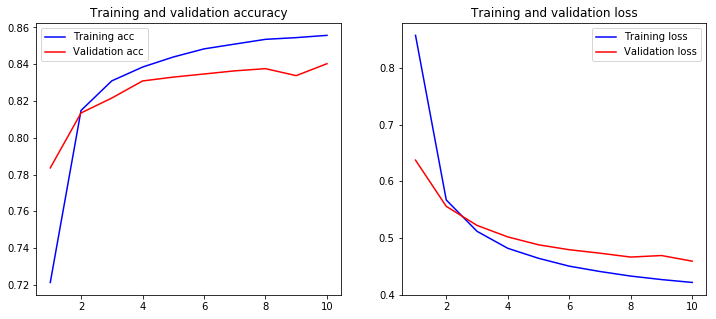

In [24]:
plot_history(history)

# 6)-Debugging

Add activation function of ReLU. It will truncate negative values

In [25]:
model = Sequential()
model.add(Flatten(input_shape=(img_width, img_height))) # flatten means that input will always be 28*28
model.add(Dense(num_classes, activation="relu"))
model.add(Dense(num_classes, activation="softmax")) 
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Fit the model
history = model.fit(
        X_train, y_train,
        batch_size=batch_size,
        epochs=10, verbose=1,
        validation_data=(X_test, y_test)
    )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 11us/sample - loss: 1.2267 - acc: 0.6119 - val_loss: 0.7672 - val_acc: 0.7390
Epoch 2/10
60000/60000 [==============================] - 1s 11us/sample - loss: 0.6680 - acc: 0.7731 - val_loss: 0.6365 - val_acc: 0.7833
Epoch 3/10
60000/60000 [==============================] - 1s 12us/sample - loss: 0.5818 - acc: 0.8029 - val_loss: 0.5831 - val_acc: 0.8027
Epoch 4/10
60000/60000 [==============================] - 1s 12us/sample - loss: 0.5406 - acc: 0.8171 - val_loss: 0.5591 - val_acc: 0.8099
Epoch 5/10
60000/60000 [==============================] - 1s 10us/sample - loss: 0.5150 - acc: 0.8247 - val_loss: 0.5400 - val_acc: 0.8146
Epoch 6/10
60000/60000 [==============================] - 1s 9us/sample - loss: 0.4968 - acc: 0.8314 - val_loss: 0.5274 - val_acc: 0.8185
Epoch 7/10
60000/60000 [==============================] - 1s 11us/sample - loss: 0.4847 - acc: 0.8345 - val_loss: 0.5

In [28]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4992200155735016
Test accuracy: 0.8263


Validation accuracy is 82 and training accuracy is 84. We are in a danger area of overfitting.

In [29]:
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

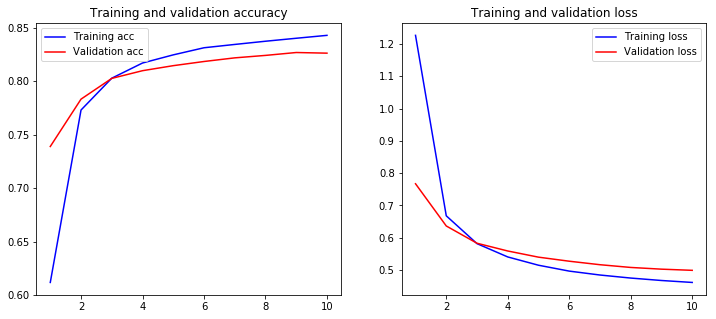

In [30]:
plot_history(history)

There is not much improvement in our results after debugging though

# 7)- Overfitting and Debugging stage 2

In [35]:
model = Sequential()
model.add(Flatten(input_shape=(img_width, img_height))) # flatten means that input will always be 28*28
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation="softmax")) 
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [36]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                7850      
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Fit the model
history = model.fit(
        X_train, y_train,
        batch_size=batch_size,
        epochs=10, verbose=1,
        validation_data=(X_test, y_test)
    )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 19us/sample - loss: 1.6047 - acc: 0.3971 - val_loss: 0.9110 - val_acc: 0.7269
Epoch 2/10
60000/60000 [==============================] - 1s 16us/sample - loss: 1.1841 - acc: 0.5406 - val_loss: 0.7302 - val_acc: 0.7581
Epoch 3/10
60000/60000 [==============================] - 1s 15us/sample - loss: 1.0931 - acc: 0.5732 - val_loss: 0.6882 - val_acc: 0.7764
Epoch 4/10
60000/60000 [==============================] - 1s 15us/sample - loss: 1.0547 - acc: 0.5831 - val_loss: 0.6582 - val_acc: 0.7832
Epoch 5/10
60000/60000 [==============================] - 1s 15us/sample - loss: 1.0291 - acc: 0.5970 - val_loss: 0.6527 - val_acc: 0.7895
Epoch 6/10
60000/60000 [==============================] - 1s 15us/sample - loss: 1.0048 - acc: 0.6053 - val_loss: 0.6322 - val_acc: 0.7951
Epoch 7/10
60000/60000 [==============================] - 1s 17us/sample - loss: 0.9936 - acc: 0.6142 - val_loss: 0.

In [38]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6048224251747132
Test accuracy: 0.8023


Actually validation accuracy has gone down. But, our training accuracy has come up in check. Earlier we were in danger of overfitting. Now using dropout, we have a more stable traing and validation accuracy score

In [39]:
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

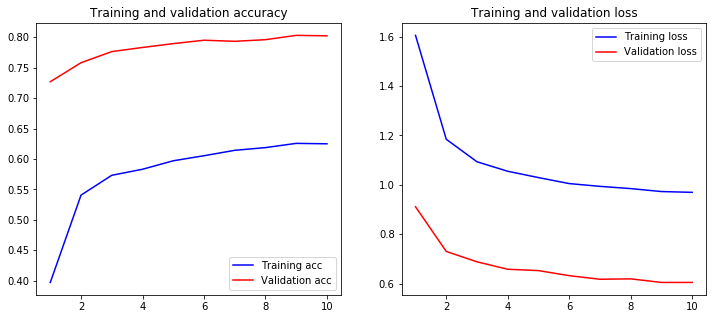

In [40]:
plot_history(history)

# Summary of our excercise

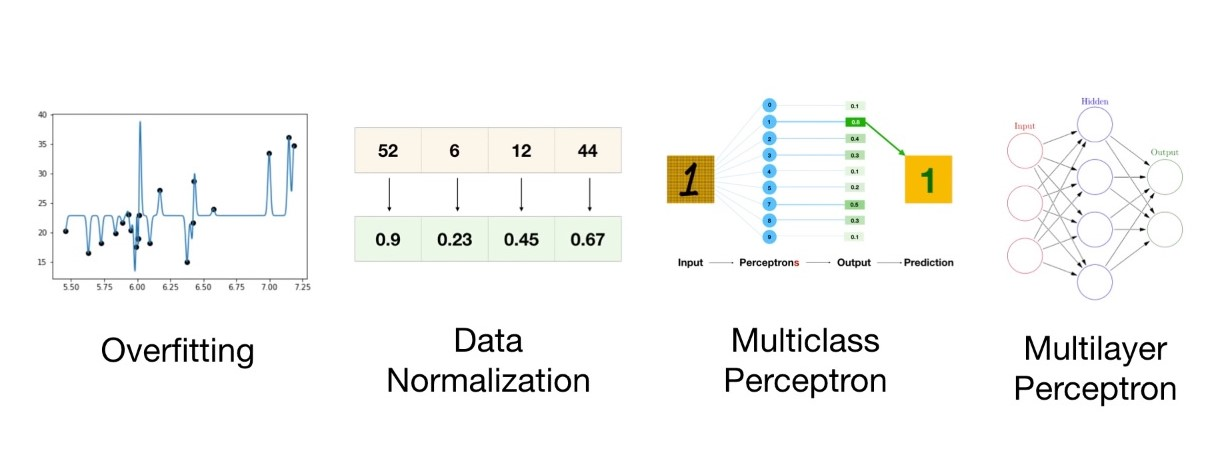

In [41]:
from IPython.display import Image
Image(filename='NN.jpg')